TEXT MINING

In [1]:
pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.1 which is incompatible.


In [2]:
!python -m spacy download en_core_web_md

2023-10-16 05:58:41.094902: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 05:58:42.201848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
!pip install wordcloud

In [4]:
pip install nltk

In [5]:
import numpy as np
import pandas as pd
import string
import spacy

In [6]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [7]:
nlp=spacy.load('en_core_web_md')

Reading data

In [8]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [9]:
elon = pd.read_csv("Elon_musk.csv",encoding = 'unicode escape')
elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


Stripping the reviews of spaces before and after the next

In [10]:
elon_musk = [x.strip() for x in elon.Text]
elon_musk = [x for x in elon_musk if x]
elon_musk[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [11]:
import spacy

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Getting sentences

In [14]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(elon_musk))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

Making the data into dataframe

In [15]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


Getting the negative words affinity values

Putting affinity to be -1 for all the words

In [16]:
from google.colab import files
uploaded = files.upload()

Saving negative-words.txt to negative-words.txt


In [17]:
afinn_n = pd.read_csv("negative-words.txt",sep=';',encoding = 'latin-1')
afinn_n.shape

(4816, 79)

In [18]:
afinn_n

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Opinion Lexicon: Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,This file contains a list of NEGATIVE opinion...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,zaps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,zealot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,zealous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4814,zealously,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
afinn_n = afinn_n.iloc[:,0]

In [20]:
afinn_n

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4811         zaps
4812       zealot
4813      zealous
4814    zealously
4815       zombie
Name: Unnamed: 0, Length: 4816, dtype: object

In [21]:
afinn_n.dropna(inplace=True)

In [22]:
afinn_n

33         2-faced
34         2-faces
35        abnormal
36         abolish
37      abominable
           ...    
4811          zaps
4812        zealot
4813       zealous
4814     zealously
4815        zombie
Name: Unnamed: 0, Length: 4783, dtype: object

In [23]:
afinn_n = afinn_n.reset_index()

In [24]:
afinn_n

,index,Unnamed: 0
0,33,2-faced
1,34,2-faces
2,35,abnormal
3,36,abolish
4,37,abominable
...,...,...
4778,4811,zaps
4779,4812,zealot
4780,4813,zealous
4781,4814,zealously


In [25]:
afinn_n['value']=-1

In [26]:
afinn_n

,index,Unnamed: 0,value
0,33,2-faced,-1
1,34,2-faces,-1
2,35,abnormal,-1
3,36,abolish,-1
4,37,abominable,-1
...,...,...,...
4778,4811,zaps,-1
4779,4812,zealot,-1
4780,4813,zealous,-1
4781,4814,zealously,-1


In [27]:
afinn_n.drop(['index'],axis = 1,inplace = True)

In [28]:
afinn_n

,Unnamed: 0,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [29]:
afinn_n.columns=['words','value']

In [30]:
afinn_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [37]:
from google.colab import files
uploaded = files.upload()

Saving positive-words.txt to positive-words (1).txt


In [38]:
afinn_p = pd.read_csv("positive-words.txt",sep = ';',encoding='latin-1')
afinn_p.shape

(2039, 77)

Getting the positive words affinity values

Putting affinity to be 1 for all the words

In [39]:
afinn_p

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Opinion Lexicon: Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,This file contains a list of POSITIVE opinion...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,youthful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2035,zeal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2036,zenith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2037,zest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
afinn_p=afinn_p.iloc[:,0]

In [41]:
afinn_p

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2034    youthful
2035        zeal
2036      zenith
2037        zest
2038       zippy
Name: Unnamed: 0, Length: 2039, dtype: object

In [42]:
afinn_p.dropna(inplace=True)

In [43]:
afinn_p

33             a+
34         abound
35        abounds
36      abundance
37       abundant
          ...    
2034     youthful
2035         zeal
2036       zenith
2037         zest
2038        zippy
Name: Unnamed: 0, Length: 2006, dtype: object

In [44]:
afinn_p = afinn_p.reset_index()

In [45]:
afinn_p['value']=1

In [46]:
afinn_p

,index,Unnamed: 0,value
0,33,a+,1
1,34,abound,1
2,35,abounds,1
3,36,abundance,1
4,37,abundant,1
...,...,...,...
2001,2034,youthful,1
2002,2035,zeal,1
2003,2036,zenith,1
2004,2037,zest,1


In [47]:
afinn_p.drop(['index'],axis=1,inplace=True)

In [48]:
afinn_p.columns=['words','value']

In [49]:
afinn_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [50]:
afinn_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [51]:
afinn_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


Concating the dataframes to get an affinity dataframe

In [52]:
afinn=pd.concat([afinn_n,afinn_p],ignore_index=True)

In [53]:
afinn

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
6784,youthful,1
6785,zeal,1
6786,zenith,1
6787,zest,1


In [54]:
affinity_scores = afinn.set_index('words')['value'].to_dict()

In [55]:
affinity_scores

{'2-faced': -1,
 '2-faces': -1,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -1,
 'accuses': -1,
 'accusing': -1,
 'accusingly': -1,
 'acerbate': -1,
 'acerbic': -1,
 'acerbically': -1,
 'ache': -1,
 'ached': -1,
 'aches': -1,
 'achey': -1,
 'aching': -1,
 'acrid': -1,
 'acridly': -1,
 'acridness': -1,
 'acrimonious': -1,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1

Defining a function to calculate sentiment

In [56]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

In [57]:
def calculate_sentiment(text: str = None):
  sent_score = 0
  if text:
    sentence = nlp(text)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0)
  return sent_score

Calculating sentiment

In [58]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

In [59]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,1
3,@gtera27 Doge is underestimated @teslacn Congr...,0
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",-1
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,0


Data with sentiment value less than 2

In [61]:
sent_df[sent_df.sentiment_value<-2]

,sentence,sentiment_value
158,We couldnt get everything done in https://t....,-3
365,4D is essential for dynamically occluded objec...,-3
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5
765,A full blown Starship and SuperHeavy will be h...,-3
889,This is primarily an electrical/electronic (ch...,-3


Data with sentiment value greater than 5

In [62]:
sent_df[sent_df.sentiment_value>5]

,sentence,sentiment_value
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",6
105,@Erdayastronaut @SpaceX Was also thinking that...,6
655,"Its not useful for predicting the future, nor...",9


Finding the word count of sentences

In [63]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)

In [64]:
sent_df.head(10)

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,1,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-1,14
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,1,10
8,Tweets definitely do not represent real-world ...,0,8
9,The most entertaining outcome is the most like...,0,109


In [65]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
776,RT @RealLifeStarman: We are going to go to th...,4,93
301,It was designed from the beginning with human ...,5,64
123,It isnt enough to be safer than human drivers...,5,51
373,@Chad_Hurley @realDonaldTrump @kanyewest Stop ...,5,65
572,@WholeMarsBlog Haha true @oneandonlyheady Mayb...,5,68
722,We just havent observed the https://t.co/mez...,5,72
583,"T https://t.co/DyNlT5EKGk @Model3Owners Fine,...",5,37
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",6,231
655,"Its not useful for predicting the future, nor...",9,118


In [66]:
sent_df['sentiment_value'].describe()

count    927.000000
mean       0.455232
std        1.240032
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [67]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6


Plotting the sentiment value

<Axes: ylabel='sentiment_value'>

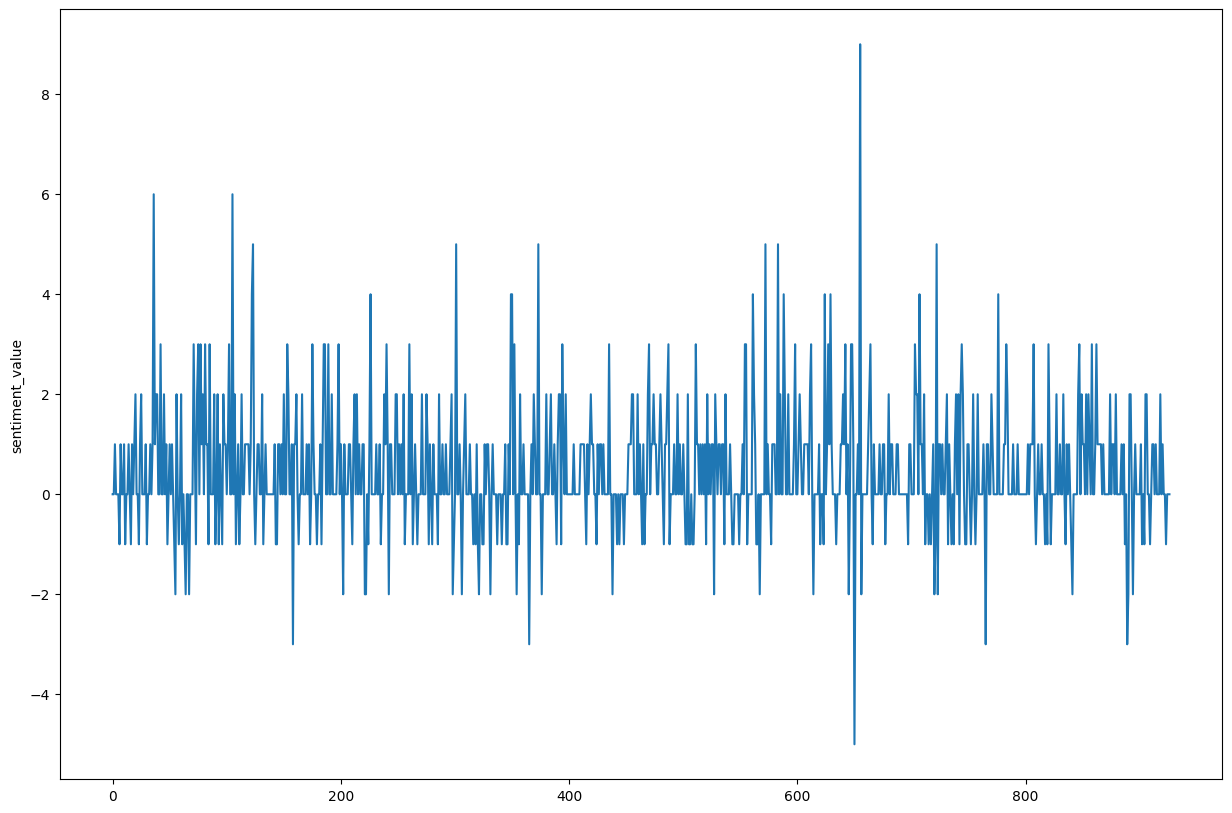

In [69]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.lineplot(y=sent_df['sentiment_value'],x=sent_df.index)

<ipython-input-70-6e3dcf195c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

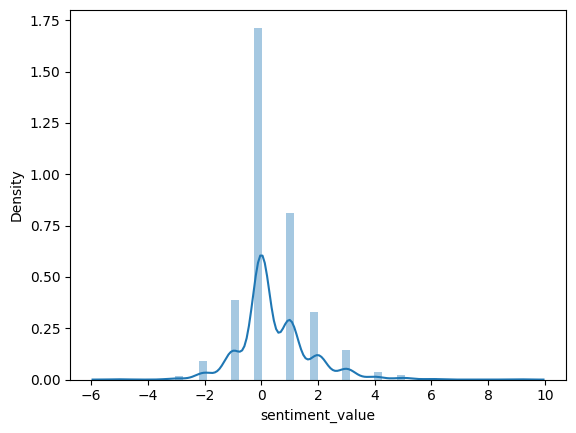

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

Plotting the scatterplot of sentiment value vs word count

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

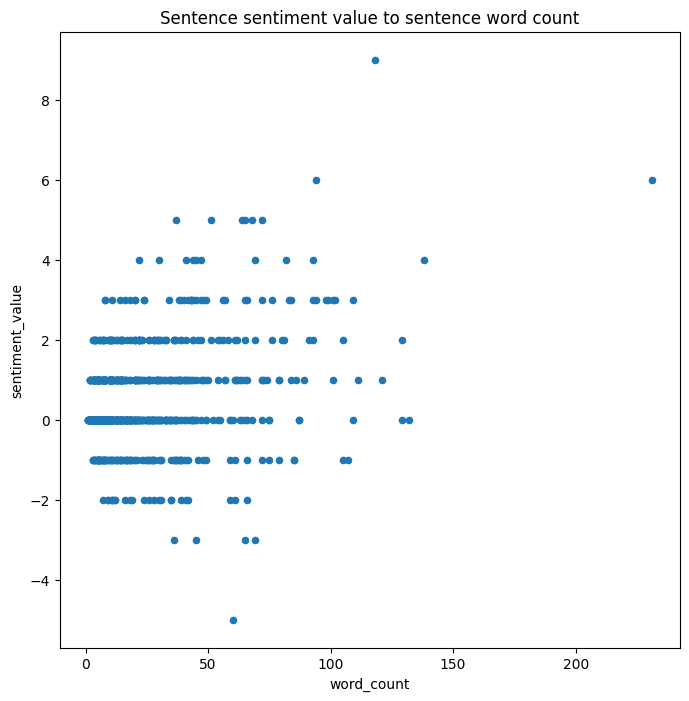

In [71]:
sent_df.plot.scatter(x='word_count', y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')